Columns: ['path', 'wav', 'true', 'pred', 'corpus', 'modality', 'channel', 'emotion', 'intensity', 'statement', 'repetition', 'actor']
Number of mis-classified samples: 39

Top 10 actors with the most errors:
 actor
11    5
22    4
9     4
15    3
10    3
19    2
14    2
16    2
23    2
7     2
Name: count, dtype: int64


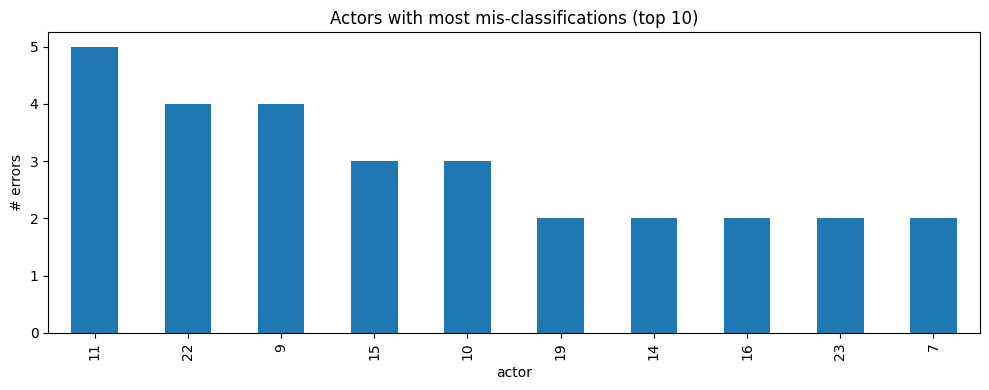


Errors by intensity (1 = normal, 2 = strong):
 intensity
1    22
2    17
Name: count, dtype: int64


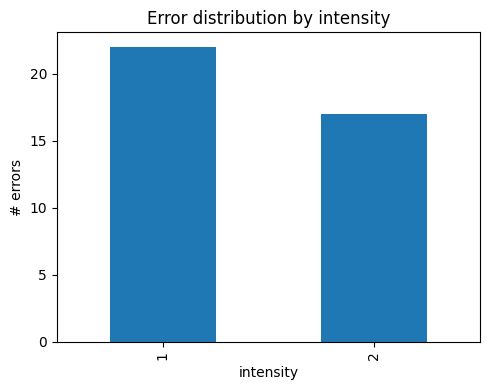


Confusion matrix of mistakes (true x pred):
 pred  0  1  2  3  4  5  6
true                     
0     0  1  1  0  0  1  1
1     0  0  1  2  2  2  1
2     1  2  0  0  2  2  2
3     0  0  0  0  0  5  0
4     0  1  3  1  0  0  0
5     0  1  0  2  0  0  2
6     1  1  0  1  0  0  0


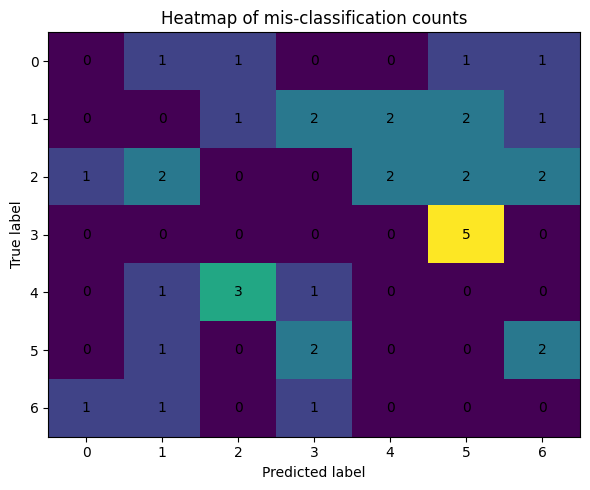

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# ---------- 1. Load the CSV ----------
csv_path = "output/images/misclassified_stacked_attention.csv"   # change if your file lives elsewhere
df = pd.read_csv(csv_path)

# ---------- 2. Basic sanity check ----------
print("Columns:", list(df.columns))
print("Number of mis-classified samples:", len(df))

# ---------- 3. Error count per actor ----------
if 'actor' in df.columns:
    actor_err = df['actor'].value_counts().sort_values(ascending=False)
    print("\nTop 10 actors with the most errors:\n", actor_err.head(10))

    plt.figure(figsize=(10,4))
    actor_err.head(10).plot(kind='bar')
    plt.ylabel("# errors")
    plt.title("Actors with most mis-classifications (top 10)")
    plt.tight_layout()
    plt.show()

# ---------- 4. Error count per emotion ----------
if 'emotion_code' in df.columns:
    emo_err = df['emotion_code'].value_counts().sort_index()
    print("\nErrors per emotion code:\n", emo_err)

    plt.figure(figsize=(8,4))
    emo_err.plot(kind='bar')
    plt.ylabel("# errors")
    plt.title("Mis-classifications by emotion code")
    plt.tight_layout()
    plt.show()

# ---------- 5. Normal vs. strong intensity ----------
if 'intensity' in df.columns:
    intens_err = df['intensity'].value_counts().sort_index()
    print("\nErrors by intensity (1 = normal, 2 = strong):\n", intens_err)

    plt.figure(figsize=(5,4))
    intens_err.plot(kind='bar')
    plt.ylabel("# errors")
    plt.title("Error distribution by intensity")
    plt.tight_layout()
    plt.show()

# ---------- 6. Confusion matrix of true vs. predicted emotion ----------
if {'true', 'pred'}.issubset(df.columns):
    conf = pd.crosstab(df['true'], df['pred'])
    print("\nConfusion matrix of mistakes (true x pred):\n", conf)

    plt.figure(figsize=(6,5))
    plt.imshow(conf, interpolation='nearest', aspect='auto')
    plt.xticks(range(conf.shape[1]), conf.columns)
    plt.yticks(range(conf.shape[0]), conf.index)
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    plt.title("Heatmap of mis-classification counts")
    for i in range(conf.shape[0]):
        for j in range(conf.shape[1]):
            plt.text(j, i, conf.iloc[i, j], ha='center', va='center')
    plt.tight_layout()
    plt.show()



Errors by statement code:
 statement
1    20
2    19
Name: count, dtype: int64


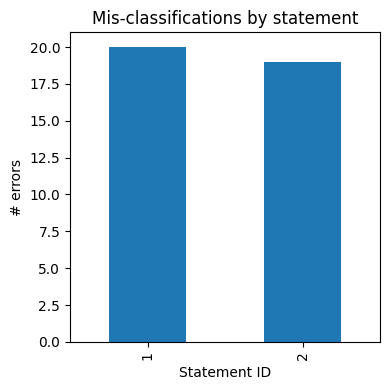


Errors by repetition (take):
 repetition
1    17
2    22
Name: count, dtype: int64


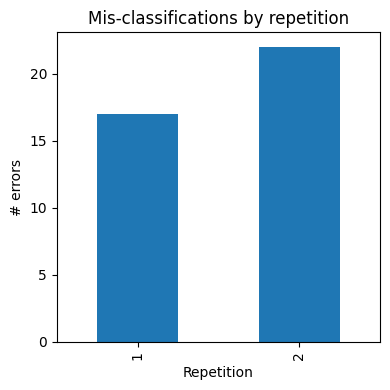

In [3]:
if 'statement' in df.columns:
    stmt_err = df['statement'].value_counts().sort_index()
    print("\nErrors by statement code:\n", stmt_err)

    plt.figure(figsize=(4,4))
    stmt_err.plot(kind='bar')
    plt.ylabel("# errors")
    plt.xlabel("Statement ID")
    plt.title("Mis-classifications by statement")
    plt.tight_layout()
    plt.show()

# ---------- 4. Errors by REPETITION (RAVDESS: 1st vs 2nd take) ----------
if 'repetition' in df.columns:
    rep_err = df['repetition'].value_counts().sort_index()
    print("\nErrors by repetition (take):\n", rep_err)

    plt.figure(figsize=(4,4))
    rep_err.plot(kind='bar')
    plt.ylabel("# errors")
    plt.xlabel("Repetition")
    plt.title("Mis-classifications by repetition")
    plt.tight_layout()
    plt.show()